In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
af = pd.read_hdf('results/ann_catchup_res_20_04_25_49.h5')
af["dup_num"] = 20
bf = pd.read_hdf('results/ann_catchup_res_10_04_25_30.h5')
bf["dup_num"] = 10

In [15]:
nf = pd.read_hdf('results/ann_catchup_res_100_05_04_55.h5')
nf["dup_num"] = 100

In [16]:
cf = pd.concat((af, bf, nf))
cf.columns

Index([u't_len', u'dims', u'n_classes', u'approach', u'accuracy', u'ad_mean',
       u'ad_std', u'gd_mean', u'gd_std', u'conf_mean', u'conf_std',
       u'aug method', u'dup_num'],
      dtype='object')

In [17]:
cf.loc[cf['approach'] == 'fvRNN', 'aug method'] = 'repeat with noise\nand fancy init'
cf.loc[cf['approach'] == 'RC', 'aug method'] = 'reservoir repeat\nwith noise'

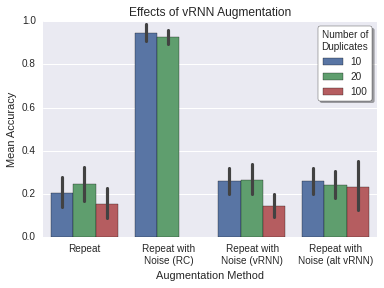

In [20]:
# we have to come up with a clever way of defining x
ff = sns.barplot(x="aug method", y="accuracy", hue="dup_num", data=cf)
ff.set_xlabel("Augmentation Method")
ff.set_ylabel("Mean Accuracy")
ff.set_title("Effects of vRNN Augmentation")
ff.set_xticklabels(
    ["Repeat", "Repeat with\nNoise (RC)", "Repeat with\nNoise (vRNN)", "Repeat with\nNoise (alt vRNN)"]
)
leg = ff.legend(title="Number of\nDuplicates", frameon=True, fancybox=True, shadow=True, framealpha=1, loc="upper right")
fl = leg.get_frame()
fl.set_facecolor('white')
fl.set_edgecolor('black')

fig = ff.get_figure()
fig.subplots_adjust(bottom=0.15)
fig.savefig("ann_catchup.pdf", format="pdf", bbox_inches='tight')